<a href="https://colab.research.google.com/github/Samanthaavilac/Taller-1-/blob/main/Entrega_Final_%C3%81vila_Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ENTREGA FINAL**
#Finanzas computacionales


---

-Samantha Ávila 

-María Paula Vargas (205)

La empresa XYZ necesita optimizar su cadena de distribución en 5 puntos de venta
(municipios) diferentes para satisfacer la demanda. Para ello, la empresa puede construir
una plata de gran (o de baja) capacidad y puede decidir el tamaño en cada ubicación.

i. Una posibilidad es construir una planta en cada municipio permitiéndole abaratar los
costos de transporte, pero tendrá que asumir altos cosos para el funcionamiento de la
planta y no podrá explotar las economías de escala dada la cercanía entre municipios.

ii. Otra posibilidad es construir algunas plantas con la ventaja de explotar las economías
de escala pero que requiere costos de transporte más altos.

Se sabe que cada tipo de planta tiene una capacidad diferente y que corresponde a: 500
para baja capacidad y 1.500 para la de gran capacidad. Además, si la empresa tiene la
demanda estimada para cada ubicación (Demanda), los costos de transporte de un punto
a otro (A-E), y los costos fijos que están en función del tamaño de la capacidad de la
planta, como muestra en la siguiente tabla:

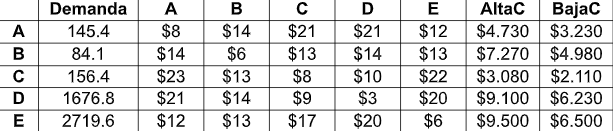

Las columnas A-E muestran el costo de transporte desde las ubicaciones desde un punto
hasta cada una de los demás indicados en las columnas. Las columnas ‘AltaC’ y ‘BajaC’
muestran el costo fijo de tener plantas de alta y baja capacidad en cada ubicación.

Finalmente, si se sabe que este problema tiene dos variables de decisión:

i. Cantidad de producción en la planta que se envía a la planta .

ii. Capacidad de producción de la planta (variable binaria con valor 1 si la planta está en la
ubicación con capacidad está abierta; y 0 si no hay).

Preguntas a resolver:

¿Cuál es la decisión optima de la empresa en su plan de producción y de distribución?

¿Qué recomendación le dan a la empresa para minimizar los costos de toda su cadena de
distribución?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [ ]:
# Inputs del problema
# Demanda de cada ubicación
demanda = np.array([145.4, 84.1, 156.4, 1676.8, 2719.6])

# Costos de transporte entre ubicacion
costos_transporte = np.array([[0, 8, 14, 21, 21],
                                [14, 0, 6, 13, 14],
                                [23, 13, 0, 8, 10],
                                [21, 14, 9, 0, 20],
                                [12, 13, 17, 20, 0]])

# Costos fijos de tener plantas de alta y baja capacidad en cada ubicación
costos_fijos_alto = np.array([4730, 7270, 3080, 9100, 9500])
costos_fijos_bajo = np.array([3230, 4980, 2110, 6230, 6500])

# Capacidades de producción de cada tipo de planta
alta_capacidad = 1500
baja_capacidad = 500

In [ ]:
# Definir función objetivo
def objective_function(x):
    alta_capacidad_costos = np.random.normal(costos_fijos_alto, costos_fijos_alto * 0.1, size=len(costos_fijos_alto))
    baja_capacidad_costos = np.random.normal(costos_fijos_bajo, costos_fijos_bajo * 0.1, size=len(costos_fijos_bajo))
    
    # Calcular costos de transporte para cada ubicación
    transporte = np.dot(costos_transporte, x)
    
    # Calcular costo fijo de construcción y operación de cada planta
    costos_fijos = alta_capacidad_costos * x + baja_capacidad_costos * (1 - x)
    
    # Calcular costo total
    costo_total = np.dot(demanda, transporte) + np.sum(costos_fijos)
    
    return costo_total

# Definir restricciones
def constraint1(x):
    return np.sum(x) - 1  # Solo se puede construir una planta por ubicación

def constraint2(x):
    altos_indices_planta = np.where(x == 1)[0]
    suma_demanda = np.sum(demanda[altos_indices_planta])
    return alta_capacidad - suma_demanda  # La capacidad de producción no puede ser menor que la demanda

def constraint3(x):
    return x  # x debe ser binaria

In [ ]:
# Resolver problema de optimización utilizando Monte Carlo
n_escenarios = 1000
results = []
for i in range(n_escenarios):
    x0 = np.random.randint(2, size=5)  # Generar solución inicial aleatoria
    bounds = [(0, 1)] * 5  # Establecer límites para las variables de decisión
    limitaciones = [{'type': 'eq', 'fun': constraint1},
                   {'type': 'ineq', 'fun': constraint2},
                   {'type': 'eq', 'fun': constraint3}]
    solucion = minimize(objective_function, x0, bounds=bounds, constraints=limitaciones)
    results.append(solucion)

# Encontrar solución óptima
mejor_solucion = min(results, key=lambda x: x.fun)

# Imprimir resultados
print("Solución óptima:")
print("x* =", mejor_solucion.x)
print("Costo total =", mejor_solucion.fun)

Solución óptima:
x* = [0. 0. 0. 0. 0.]
Costo total = 21151.88032099456


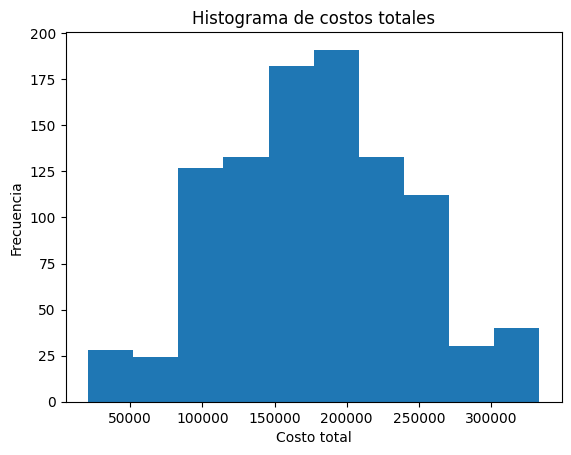

In [ ]:
import matplotlib.pyplot as plt

# Obtener lista de costos
costos = [result.fun for result in results]

# Crear histograma
plt.hist(costos, bins=10)

# Establecer etiquetas y título
plt.xlabel('Costo total')
plt.ylabel('Frecuencia')
plt.title('Histograma de costos totales')

# Mostrar gráfico
plt.show()

## Ubicación de instalaciones y reducción de costos

La empresa XYZ necesita optimizar su cadena de distribución en 5 puntos de venta diferentes para satisfacer la demanda. Para ello, se quiere determinar si se construye una planta de baja o alta capacidad y decidir el tamaño en cada ubicación, teniendo en cuenta que puede haber dos posibilidades la primera consiste en construir una planta en cada municipio la cual permita abaratar los costos de transporte, sin embargo, esta tendrá que asumir altos cosos para el funcionamiento de la planta y no podrá explotar las economías de escala dada la cercanía entre municipios, asimismo la segunda posibilidad consiste en la construcción de algunas plantas que tienen la ventaja de explorar las economías de escala pero que requieren costos de transporte más altos.
La finalidad de este análisis es definir las interrogantes planteadas, ¿Cuál es la decisión optima de la empresa en su plan de producción y de distribución? Y ¿Qué recomendación le damos a la empresa para minimizar los costos de toda su cadena de distribución?
Para este fin obtuvimos información como las capacidades de las plantas tanto de alta como de baja capacidad, también la demanda estimada para cada ubicación, los costos de transporte de un punto a otro, y los costos fijos en función del tamaño de la capacidad de la planta. 
Con los datos obtenidos iniciamos la implementación del modelo de optimización agregando los inputs del problema con las variables anteriormente mencionadas, seguido de esto definimos la función objetivo y de esta forma calculamos el costo de transporte para cada ubicación, el costo fijo de construcción y operación de cada planta y el costo total, luego de esto definimos las restricciones que son tres solo se puede construir una planta por ubicación, la capacidad de producción no puede ser menor que la demanda y x debe ser binaria, de esta forma procedimos a resolver el problema de optimización haciendo uso del modelo de Monte Carlo primero generando una solución inicial aleatoria y estableciendo limites para las variables de decisión, los cuales se podrían traducir en las restricciones dadas y de esta manera encontrar la solución optima al problema planteado. 
Para minimizar los costos de toda la cadena de distribución, recomendamos a la empresa considerar los siguientes puntos:
Evaluar opciones de transporte más económicas: la matriz costos_transporte indica los costos de transporte entre cada ubicación, mejorar la eficiencia de producción, analizar opciones de ubicación, explorar opciones de distribución más eficientes, en general, la empresa puede hacer uso de técnicas de análisis de la cadena de suministro para poder identificar las áreas de mejora en la cadena de distribución y reducir los costos.
Por tanto nuestra recomendación para la empresa es construir 5 plantas de baja capacidad que tendrian un costo de $ 21151.88



